# Group Project 2

### Author: Daniel Alvarez

# Predicting poverty levels amongst households in Costa Rica

Summary:

We are exploring a Kaggle competition dataset sponsored by the Inter-American Development Bank (IADB) on predicting poverty levels amongst households in Costa Rica. The premise of the competition is to refine the algorithm used to verify income qualification for anti-poverty aid programs, known as the Proxy Means Test (PMT). Accuracy with PMT in targeting households has been problematic in the region and the IADB has been compelled to improve PMT’s performance.  


In [2]:
### Import packages
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
cd './IADB_data'

/Users/dalvarez83/Documents/MastersDataScience/UCBerkeley/W200_Python/assignments_upstream_summer18/project_2/IADB_data


In [5]:
#Read in data
ID = []

train_data_read = open('train.csv','rt')
train = csv.reader(train_data_read)

# To skip column headers use next()
#next(train)

for row in train:
    print(row)
    ID.append(row[0])

#create a identifier variable
identifier = np.array(ID)

['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadoci

['ID_48391377d', '', '0', '3', '0', '1', '1', '1', '1', '1', '2', '3', '0', '1', '1', '1', '3', '4', '4', '4', '8', '', '4', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2477f3a5c', '2', '2', '0', '4', 'yes', '7', 'no', '7.5', '0', '0', '0', '1', '0', '0', '0', '0', '0', '2', '2.0', '0', '0', '0', '0', '1', '1', '1', '1', '4', '1', '0', '0', '0', '0', '0', '1', '0', '34', '64', '1156', '16', '49', '4', '4.0', '1.0', '56.25', '1156', '4']
['ID_f971b9fbb', '', '0', '3', '0', '1', '1', '1', '1', '1', '2', '3', '0', '1', '1', '1', '3', '4', '4', '4', '7', '', '4', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0

['ID_988e8d8bd', '', '0', '6', '0', '0', '1', '0', '', '0', '3', '3', '0', '1', '1', '0', '4', '4', '4', '4', '11', '', '4', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '7153e9c94', '1', '3', '1', '4', 'yes', '11', 'no', '8.333333', '0', '0', '0', '0', '1', '0', '0', '0', '0', '3', '1.3333334', '1', '0', '0', '0', '0', '0', '0', '1', '3', '1', '0', '0', '0', '0', '0', '1', '0', '20', '121', '400', '16', '121', '1', '1.7777778999999998', '1.0', '69.444443', '400', '2']
['ID_e05496648', '', '0', '6', '0', '0', '1', '0', '', '0', '3', '3', '0', '1', '1', '0', '4', '4', '4', '4', '8', '1', '4', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '

['ID_09a032bcd', '350000.0', '0', '6', '0', '1', '1', '0', '', '0', '4', '4', '0', '3', '3', '0', '7', '7', '7', '7', '6', '', '7', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'b8618998c', '2', '5', '0', '7', '.40000001', '6', 'no', '10.0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '5', '1.4', '0', '0', '1', '0', '0', '0', '0', '1', '3', '1', '0', '0', '0', '0', '0', '1', '0', '50', '36', '2500', '49', '36', '4', '1.9599999', '0.16000001', '100.0', '2500', '4']
['ID_af2d1cd53', '350000.0', '0', '6', '0', '1', '1', '0', '', '0', '4', '4', '0', '3', '3', '0', '7', '7', '7', '7', '9', '', '7', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.



['ID_494b508a4', '', '0', '4', '0', '1', '1', '0', '', '0', '2', '2', '0', '1', '1', '0', '3', '3', '3', '3', '6', '', '3', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '7c97278a8', '0', '3', '1', '3', '.5', 'no', '6', '8.0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '2', '1.5', '1', '0', '0', '0', '0', '0', '0', '1', '2', '0', '0', '1', '0', '0', '0', '1', '0', '45', '36', '2025', '9', '0', '0', '2.25', '0.25', '64.0', '2025', '1']
['ID_d903b447c', '', '0', '5', '0', '1', '1', '0', '', '0', '2', '2', '0', '1', '1', '0', '3', '3', '3', '3', '6', '', '3', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', 

['ID_686d2639f', '150000.0', '1', '3', '0', '0', '1', '0', '', '2', '2', '4', '1', '1', '2', '3', '3', '6', '6', '6', '2', '1', '6', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'f2bfa75c4', '4', '2', '0', '6', '2', '6', 'no', '9.5', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '6.0', '0', '0', '1', '0', '0', '0', '0', '1', '2', '0', '0', '0', '1', '0', '0', '0', '1', '10', '4', '100', '36', '36', '16', '36.0', '4.0', '90.25', '100', '3']
['ID_b84170356', '150000.0', '1', '3', '0', '0', '1', '0', '', '2', '2', '4', '1', '1', '2', '3', '3', '6', '6', '6', '3', '1', '6', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0',

['ID_59ee7f11e', '', '0', '6', '0', '1', '1', '0', '', '1', '3', '4', '0', '2', '2', '1', '5', '6', '6', '6', '0', '', '6', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '2b42b5570', '2', '4', '1', '6', 'yes', '6', 'no', '7.25', '1', '0', '0', '0', '0', '0', '0', '0', '0', '3', '2.0', '1', '0', '0', '0', '0', '0', '0', '1', '2', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '36', '36', '4', '4.0', '1.0', '52.5625', '1', '2']
['ID_38c6f97ae', '', '0', '6', '0', '1', '1', '0', '', '1', '3', '4', '0', '2', '2', '1', '5', '6', '6', '6', '6', '', '6', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',

In [6]:
# Total number of rows
print(len(identifier))

# Ensure identifiers are unique using set() function
print(len(set(identifier)))

9558
9558


In [3]:
# Read in csv and create a dataframe using pandas
train = pd.read_csv('train.csv')
df = pd.DataFrame(train)

In [4]:
# Peak into the data and explore the column headers 
df.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0   ...            100    1849               1        100             0   
1     0   ...            144    4489               1        144             0   
2     0   ...            121    8464               1          0             0   
3     0   ...             81     289              16        121             4   
4     0   ...            121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [5]:
# Size of dataframe
print(df.shape) 

# Information of dataframe
print(df.info())

# Length of dataframe
print(len(df))

# Counts of each variable, excluding NaN values
print(df.count())

(9557, 143)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB
None
9557
Id                 9557
v2a1               2697
hacdor             9557
rooms              9557
hacapo             9557
v14a               9557
refrig             9557
v18q               9557
v18q1              2215
r4h1               9557
r4h2               9557
r4h3               9557
r4m1               9557
r4m2               9557
r4m3               9557
r4t1               9557
r4t2               9557
r4t3               9557
tamhog             9557
tamviv             9557
escolari           9557
rez_esc            1629
hhsize             9557
paredblolad        9557
paredzocalo        9557
paredpreb          9557
pareddes           9557
paredmad           9557
paredzinc          9557
paredfibras        9557
                   ... 
bedrooms           9557
overcrowding       9557
tipovivi1   

### Explore identifier variables

In [86]:
# Show number of unique ID variables
print(len(set(df.Id)))

9557


In [89]:
# Check that length of dataframe is equal to number of unique ID variables
len(set(df.Id)) == len(df)

True

In [17]:
# Show number of unique identifier variables for each household
print(len(set(df.idhogar)))

2988


Finding: This tells us that there can be multiple unique ID variables for each household identifier

In [93]:
# Count values indicating if person is head of household
df.groupby('parentesco1').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
parentesco1                                                                 
0            6584  1880    6584   6584    6584  6584    6584  6584   1560   
1            2973   817    2973   2973    2973  2973    2973  2973    655   

             r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
parentesco1         ...                                                     
0            6584   ...           6584    6584            6584       6584   
1            2973   ...           2973    2973            2973       2973   

             SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  \
parentesco1                                                                   
0                    6584             6584           6584       6582   6584   
1                    2973             2973           2973       2970   2973   

             Target  
parentesco1          
0              6584  
1              2973  

[2 rows x 142 columns]

In [12]:
print("Counts of Identifiers by Head of Household")
df.parentesco1.value_counts()

Counts of Identifiers by Head of Household


0    6584
1    2973
Name: parentesco1, dtype: int64

In [44]:
parentesco1_tab = pd.crosstab(index=df["parentesco1"], columns="count") 
parentesco1_tab
parentesco1freq = parentesco1_tab/parentesco1_tab.sum()
parentesco1freq

col_0           count
parentesco1          
0            0.688919
1            0.311081

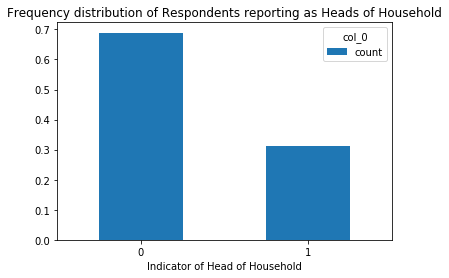

In [45]:
# Plot frequency percentages by head of household
parentesco1freq.plot(kind='bar')
plt.title('Frequency distribution of Respondents reporting as Heads of Household')
plt.xlabel("Indicator of Head of Household")
plt.xticks(rotation=0)
plt.show()

Finding: This indicates that the majority of persons surveyed are not heads of household

### Explore Target poverty level variable of interest

In [10]:
# Count values of the Target variable of interest
df.groupby('Target').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  \
Target                                                                       
1        755   153     755    755     755   755     755   755     60   755   
2       1597   337    1597   1597    1597  1597    1597  1597    125  1597   
3       1209   300    1209   1209    1209  1209    1209  1209    143  1209   
4       5996  1907    5996   5996    5996  5996    5996  5996   1887  5996   

        ...     age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
Target  ...                                                           
1       ...     755          755     755             755        755   
2       ...    1597         1597    1597            1597       1597   
3       ...    1209         1209    1209            1209       1209   
4       ...    5996         5996    5996            5996       5996   

        SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  
Target                                                                  
1                755              755            755        755    755  
2               1597             1597           1597       1597   1597  
3               1209             1209           1209       1209   1209  
4               5996             5996           5996       5991   5996  

[4 rows x 142 columns]

In [26]:
df = df.rename(columns={'Target': 'PovertyLevel'})
print("Counts by Income Level")
df.PovertyLevel.value_counts()
pd.crosstab(index=df["PovertyLevel"], columns="count")

Counts by Income Level


col_0         count
PovertyLevel       
1               755
2              1597
3              1209
4              5996

In [54]:
povertyleveltab=pd.crosstab(index=df["PovertyLevel"], columns="count")
povertylevelfreq= povertyleveltab/povertyleveltab.sum()
povertylevelfreq

col_0            count
PovertyLevel          
1             0.079000
2             0.167103
3             0.126504
4             0.627394

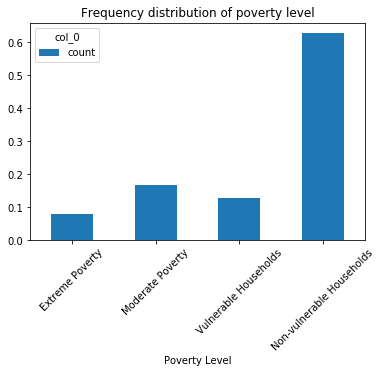

In [56]:
# Frequency histogram by poverty level
povertylevelfreq.plot(kind='bar')
plt.title("Frequency distribution of poverty level")
plt.xlabel("Poverty Level")
plt.xticks(np.arange(4), ('Extreme Poverty', 'Moderate Poverty', 'Vulnerable Households', 'Non-vulnerable Households'), rotation=45)
plt.show()

Finding: The majority of observations are considered target poverty level '4' or non-vulnerable households. The smallest proportion are considered target poverty level '1' or extreme poverty.

## Investigate variables from 'ID' through 'female'

Search for missing or null values for each variable. Produce summary statistics. 
Discuss findings from reviewing each variable.

In [17]:
# Count the nulls in each column
print("Variables that are missing data")
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


Variables that are missing data


v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

This indicates that the variables v2a1, v18q1 and rez_esc have many null values.  These variables may not be worth including in the final data analysis.

Proceed by exploring cases of null values for those variables with sparse NaNs.

In [57]:
# Show rows where meaneduc is null
print(df[df["meaneduc"].isnull()])

                Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
1291  ID_bd8e11b0f       NaN       0      7       0     1       1     0   
1840  ID_46ff87316  110000.0       0      1       0     1       1     0   
1841  ID_69f50bf3e  110000.0       0      1       0     1       1     0   
2049  ID_db3168f9f  180000.0       0      3       0     1       1     0   
2050  ID_2a7615902  180000.0       0      3       0     1       1     0   

      v18q1  r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
1291    NaN     0   ...            100     324               1          0   
1840    NaN     0   ...             36     324               4         16   
1841    NaN     0   ...             16     324               4         16   
2049    NaN     0   ...            144     361               4        144   
2050    NaN     0   ...            144     361               4        144   

      SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
1291   

In [58]:
# Show rows where SQBmeaned is null
print(df[df["SQBmeaned"].isnull()])

                Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
1291  ID_bd8e11b0f       NaN       0      7       0     1       1     0   
1840  ID_46ff87316  110000.0       0      1       0     1       1     0   
1841  ID_69f50bf3e  110000.0       0      1       0     1       1     0   
2049  ID_db3168f9f  180000.0       0      3       0     1       1     0   
2050  ID_2a7615902  180000.0       0      3       0     1       1     0   

      v18q1  r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
1291    NaN     0   ...            100     324               1          0   
1840    NaN     0   ...             36     324               4         16   
1841    NaN     0   ...             16     324               4         16   
2049    NaN     0   ...            144     361               4        144   
2050    NaN     0   ...            144     361               4        144   

      SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
1291   

Note that the variables meaneduc and SQBmeaned are null for exactly the same observations.

### Explore overcrowding variables

In [59]:
# overcrowding of bedrooms
df.groupby('hacdor').count()

Id  v2a1  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  r4h2  \
hacdor                                                                     
0       9193  2579   9193    9193  9193    9193  9193   2196  9193  9193   
1        364   118    364     364   364     364   364     19   364   364   

         ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
hacdor   ...                                                                   
0        ...           9193    9193            9193       9193          9193   
1        ...            364     364             364        364           364   

        SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
hacdor                                                            
0                  9193           9193       9188   9193    9193  
1                   364            364        364    364     364  

[2 rows x 142 columns]

In [60]:
# overcrowding of rooms
df.groupby('hacapo').count()

Id  v2a1  hacdor  rooms  v14a  refrig  v18q  v18q1  r4h1  r4h2  \
hacapo                                                                     
0       9331  2636    9331   9331  9331    9331  9331   2204  9331  9331   
1        226    61     226    226   226     226   226     11   226   226   

         ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
hacapo   ...                                                                   
0        ...           9331    9331            9331       9331          9331   
1        ...            226     226             226        226           226   

        SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
hacapo                                                            
0                  9331           9331       9326   9331    9331  
1                   226            226        226    226     226  

[2 rows x 142 columns]

Finding: Most households are not considered overcrowded. This measure might be suspect if measure is self-reported.

### Explore household physical attributes

In [71]:
# Summary statistics for number of rooms
df.rooms.describe()

count    9557.000000
mean        4.955530
std         1.468381
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        11.000000
Name: rooms, dtype: float64

In [72]:
# Counts for number of rooms
df.groupby('rooms').count()

Id  v2a1  hacdor  hacapo  v14a  refrig  v18q  v18q1  r4h1  r4h2  \
rooms                                                                      
1        97    27      97      97    97      97    97      0    97    97   
2       188    73     188     188   188     188   188     10   188   188   
3       890   294     890     890   890     890   890     91   890   890   
4      2587   779    2587    2587  2587    2587  2587    427  2587  2587   
5      2940   835    2940    2940  2940    2940  2940    636  2940  2940   
6      1607   458    1607    1607  1607    1607  1607    482  1607  1607   
7       732   143     732     732   732     732   732    280   732   732   
8       298    61     298     298   298     298   298    185   298   298   
9       168    21     168     168   168     168   168     78   168   168   
10       43     6      43      43    43      43    43     19    43    43   
11        7     0       7       7     7       7     7      7     7     7   

        ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
rooms   ...                                                                   
1       ...             97      97              97         97            97   
2       ...            188     188             188        188           188   
3       ...            890     890             890        890           890   
4       ...           2587    2587            2587       2587          2587   
5       ...           2940    2940            2940       2940          2940   
6       ...           1607    1607            1607       1607          1607   
7       ...            732     732             732        732           732   
8       ...            298     298             298        298           298   
9       ...            168     168             168        168           168   
10      ...             43      43              43         43            43   
11      ...              7       7               7          7             7   

       SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
rooms                                                            
1                   97             97         95     97      97  
2                  188            188        188    188     188  
3                  890            890        888    890     890  
4                 2587           2587       2587   2587    2587  
5                 2940           2940       2940   2940    2940  
6                 1607           1607       1607   1607    1607  
7                  732            732        731    732     732  
8                  298            298        298    298     298  
9                  168            168        168    168     168  
10                  43             43         43     43      43  
11                   7              7          7      7       7  

[11 rows x 142 columns]

Finding: Most households have between 3 and 6 rooms

In [75]:
# Counts for has toilets in the household
df.groupby('v14a').count()

Id  v2a1  hacdor  rooms  hacapo  refrig  v18q  v18q1  r4h1  r4h2  \
v14a                                                                       
0       50    11      50     50      50      50    50      1    50    50   
1     9507  2686    9507   9507    9507    9507  9507   2214  9507  9507   

       ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
v14a   ...                                                                   
0      ...             50      50              50         50            50   
1      ...           9507    9507            9507       9507          9507   

      SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
v14a                                                            
0                  50             50         50     50      50  
1                9507           9507       9502   9507    9507  

[2 rows x 142 columns]

Finding: Most households have toilets

In [77]:
# Counts for if household has a refrigerator
df.groupby('refrig').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  v18q  v18q1  r4h1  r4h2  \
refrig                                                                     
0        405    71     405    405     405   405   405     24   405   405   
1       9152  2626    9152   9152    9152  9152  9152   2191  9152  9152   

         ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
refrig   ...                                                                   
0        ...            405     405             405        405           405   
1        ...           9152    9152            9152       9152          9152   

        SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
refrig                                                            
0                   405            405        405    405     405  
1                  9152           9152       9147   9152    9152  

[2 rows x 142 columns]

Finding: Most households have a refrigerator

In [78]:
# Counts for if household owns a tablet
df.groupby('v18q').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q1  r4h1  r4h2  \
v18q                                                                       
0     7342  1923    7342   7342    7342  7342    7342      0  7342  7342   
1     2215   774    2215   2215    2215  2215    2215   2215  2215  2215   

       ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
v18q   ...                                                                   
0      ...           7342    7342            7342       7342          7342   
1      ...           2215    2215            2215       2215          2215   

      SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
v18q                                                            
0                7342           7342       7337   7342    7342  
1                2215           2215       2215   2215    2215  

[2 rows x 142 columns]

Finding: Most households do not own a tablet

### Gender-specific attributes of the household

In [79]:
# Explore summary statistics for males younger than 12 years of age
df.r4h1.describe()

count    9557.000000
mean        0.385895
std         0.680779
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: r4h1, dtype: float64

In [80]:
# Counts for males younger than 12 years of age
df.groupby('r4h1').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h2  \
r4h1                                                                       
0     6718  1732    6718   6718    6718  6718    6718  6718   1536  6718   
1     2141   745    2141   2141    2141  2141    2141  2141    575  2141   
2      607   176     607    607     607   607     607   607     99   607   
3       53    15      53     53      53    53      53    53      5    53   
4       16    16      16     16      16    16      16    16      0    16   
5       22    13      22     22      22    22      22    22      0    22   

       ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
r4h1   ...                                                                   
0      ...           6718    6718            6718       6718          6718   
1      ...           2141    2141            2141       2141          2141   
2      ...            607     607             607        607           607   
3      ...             53      53              53         53            53   
4      ...             16      16              16         16            16   
5      ...             22      22              22         22            22   

      SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
r4h1                                                            
0                6718           6718       6713   6718    6718  
1                2141           2141       2141   2141    2141  
2                 607            607        607    607     607  
3                  53             53         53     53      53  
4                  16             16         16     16      16  
5                  22             22         22     22      22  

[6 rows x 142 columns]

Finding: The majority of households do not have males younger than 12 years of age

In [81]:
# Counts for males older than 12 years of age
df.groupby('r4h2').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  \
r4h2                                                                       
0      954   279     954    954     954   954     954   954    207   954   
1     4370  1348    4370   4370    4370  4370    4370  4370   1051  4370   
2     2775   820    2775   2775    2775  2775    2775  2775    652  2775   
3     1057   175    1057   1057    1057  1057    1057  1057    226  1057   
4      278    64     278    278     278   278     278   278     57   278   
5       71    11      71     71      71    71      71    71     11    71   
6       31     0      31     31      31    31      31    31      0    31   
7       11     0      11     11      11    11      11    11     11    11   
8       10     0      10     10      10    10      10    10      0    10   

       ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
r4h2   ...                                                                   
0      ...            954     954             954        954           954   
1      ...           4370    4370            4370       4370          4370   
2      ...           2775    2775            2775       2775          2775   
3      ...           1057    1057            1057       1057          1057   
4      ...            278     278             278        278           278   
5      ...             71      71              71         71            71   
6      ...             31      31              31         31            31   
7      ...             11      11              11         11            11   
8      ...             10      10              10         10            10   

      SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
r4h2                                                            
0                 954            954        953    954     954  
1                4370           4370       4368   4370    4370  
2                2775           2775       2773   2775    2775  
3                1057           1057       1057   1057    1057  
4                 278            278        278    278     278  
5                  71             71         71     71      71  
6                  31             31         31     31      31  
7                  11             11         11     11      11  
8                  10             10         10     10      10  

[9 rows x 142 columns]

Finding: The majority of households have between 1 and 3 males older than 12 years of age

In [82]:
# Counts for total males in household
df.groupby('r4h3').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  \
r4h3                                                                       
0      628   169     628    628     628   628     628   628    158   628   
1     3142   850    3142   3142    3142  3142    3142  3142    700  3142   
2     3211  1040    3211   3211    3211  3211    3211  3211    804  3211   
3     1760   470    1760   1760    1760  1760    1760  1760    402  1760   
4      507   130     507    507     507   507     507   507    121   507   
5      181     6     181    181     181   181     181   181      8   181   
6       94    19      94     94      94    94      94    94     11    94   
7       24    13      24     24      24    24      24    24     11    24   
8       10     0      10     10      10    10      10    10      0    10   

       ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
r4h3   ...                                                                   
0      ...            628     628             628        628           628   
1      ...           3142    3142            3142       3142          3142   
2      ...           3211    3211            3211       3211          3211   
3      ...           1760    1760            1760       1760          1760   
4      ...            507     507             507        507           507   
5      ...            181     181             181        181           181   
6      ...             94      94              94         94            94   
7      ...             24      24              24         24            24   
8      ...             10      10              10         10            10   

      SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
r4h3                                                            
0                 628            628        627    628     628  
1                3142           3142       3140   3142    3142  
2                3211           3211       3209   3211    3211  
3                1760           1760       1760   1760    1760  
4                 507            507        507    507     507  
5                 181            181        181    181     181  
6                  94             94         94     94      94  
7                  24             24         24     24      24  
8                  10             10         10     10      10  

[9 rows x 142 columns]

Finding: The majority of households have between 1 and 3 males

### Explore other non-physical attribute variables

In [40]:
# Counts for dependency variable
df.groupby('dependency').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
dependency                                                                 
.16666667      7     0       7      7       7     7       7     7      0   
.2            90    18      90     90      90    90      90    90     24   
.22222222     11    11      11     11      11    11      11    11     11   
.25          260    65     260    260     260   260     260   260     65   
.2857143       9     0       9      9       9     9       9     9      0   
.33333334    598   116     598    598     598   598     598   598    144   
.40000001     84     7      84     84      84    84      84    84     28   
.5          1497   528    1497   1497    1497  1497    1497  1497    417   
.60000002      8     0       8      8       8     8       8     8      0   
.66666669    487   130     487    487     487   487     487   487    100   
.71428573     12     0      12     12      12    12      12    12      0   
.75           98    21      98     98      98    98      98    98     14   
.80000001     18     0      18     18      18    18      18    18      0   
.83333331     11     0      11     11      11    11      11    11     11   
1.2           11     0      11     11      11    11      11    11      0   
1.25          18     0      18     18      18    18      18    18      0   
1.3333334     84    35      84     84      84    84      84    84     28   
1.5          713   223     713    713     713   713     713   713    185   
1.6666666      8     0       8      8       8     8       8     8      0   
1.75          11     0      11     11      11    11      11    11      0   
2            730   153     730    730     730   730     730   730    135   
2.25          13    13      13     13      13    13      13    13      0   
2.5           77    21      77     77      77    77      77    77     14   
3            236    68     236    236     236   236     236   236     24   
3.5           18     0      18     18      18    18      18    18      0   
4            100    40     100    100     100   100     100   100     20   
5             24     6      24     24      24    24      24    24      0   
6              7     7       7      7       7     7       7     7      0   
8            378    28     378    378     378   378     378   378     42   
no          1747   484    1747   1747    1747  1747    1747  1747    429   
yes         2192   723    2192   2192    2192  2192    2192  2192    524   

            r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
dependency         ...                                                     
.16666667      7   ...              7       7               7          7   
.2            90   ...             90      90              90         90   
.22222222     11   ...             11      11              11         11   
.25          260   ...            260     260             260        260   
.2857143       9   ...              9       9               9          9   
.33333334    598   ...            598     598             598        598   
.40000001     84   ...             84      84              84         84   
.5          1497   ...           1497    1497            1497       1497   
.60000002      8   ...              8       8               8          8   
.66666669    487   ...            487     487             487        487   
.71428573     12   ...             12      12              12         12   
.75           98   ...             98      98              98         98   
.80000001     18   ...             18      18              18         18   
.83333331     11   ...             11      11              11         11   
1.2           11   ...             11      11              11         11   
1.25          18   ...             18      18              18         18   
1.3333334     84   ...             84      84              84         84   
1.5          713   ...            713     713             713

Note that there are string values "no" and "yes" as well as numerical entries for the 'dependency' column.  Need to make a decision on how to treat the string values, if we want to include the 'dependency' column for our analysis.

Explore number of people in household variables

In [35]:
# Number of children 0 to 19 years of age
df.groupby('hogar_nin').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  \
hogar_nin                                                                       
0          2997   582    2997   2997    2997  2997    2997  2997    617  2997   
1          2529   762    2529   2529    2529  2529    2529  2529    671  2529   
2          2278   764    2278   2278    2278  2278    2278  2278    583  2278   
3          1110   398    1110   1110    1110  1110    1110  1110    247  1110   
4           395   117     395    395     395   395     395   395     71   395   
5           135    27     135    135     135   135     135   135     18   135   
6            63    24      63     63      63    63      63    63      8    63   
7            18     0      18     18      18    18      18    18      0    18   
8            19    10      19     19      19    19      19    19      0    19   
9            13    13      13     13      13    13      13    13      0    13   

            ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
hogar_nin   ...                                                     
0           ...           2997    2997            2997       2997   
1           ...           2529    2529            2529       2529   
2           ...           2278    2278            2278       2278   
3           ...           1110    1110            1110       1110   
4           ...            395     395             395        395   
5           ...            135     135             135        135   
6           ...             63      63              63         63   
7           ...             18      18              18         18   
8           ...             19      19              19         19   
9           ...             13      13              13         13   

           SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  \
hogar_nin                                                                   
0                  2997             2997           2997       2997   2997   
1                  2529             2529           2529       2528   2529   
2                  2278             2278           2278       2274   2278   
3                  1110             1110           1110       1110   1110   
4                   395              395            395        395    395   
5                   135              135            135        135    135   
6                    63               63             63         63     63   
7                    18               18             18         18     18   
8                    19               19             19         19     19   
9                    13               13             13         13     13   

           Target  
hogar_nin          
0            2997  
1            2529  
2            2278  
3            1110  
4             395  
5             135  
6              63  
7              18  
8              19  
9              13  

[10 rows x 142 columns]

In [36]:
# Number of individuals 65+ in the household
df.groupby('hogar_mayor').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
hogar_mayor                                                                 
0            7529  2503    7529   7529    7529  7529    7529  7529   1831   
1            1386   155    1386   1386    1386  1386    1386  1386    299   
2             597    36     597    597     597   597     597   597     76   
3              45     3      45     45      45    45      45    45      9   

             r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
hogar_mayor         ...                                                     
0            7529   ...           7529    7529            7529       7529   
1            1386   ...           1386    1386            1386       1386   
2             597   ...            597     597             597        597   
3              45   ...             45      45              45         45   

             SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  \
hogar_mayor                                                                   
0                    7529             7529           7529       7524   7529   
1                    1386             1386           1386       1386   1386   
2                     597              597            597        597    597   
3                      45               45             45         45     45   

             Target  
hogar_mayor          
0              7529  
1              1386  
2               597  
3                45  

[4 rows x 142 columns]

In [37]:
# Number of adults in household
df.groupby('hogar_adul').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
hogar_adul                                                                 
0              5     4       5      5       5     5       5     5      0   
1           1077   345    1077   1077    1077  1077    1077  1077    157   
2           4462  1439    4462   4462    4462  4462    4462  4462   1106   
3           2199   531    2199   2199    2199  2199    2199  2199    513   
4           1247   321    1247   1247    1247  1247    1247  1247    308   
5            367    46     367    367     367   367     367   367     80   
6            107     0     107    107     107   107     107   107     40   
7             52     0      52     52      52    52      52    52      0   
8             20     0      20     20      20    20      20    20      0   
9             21    11      21     21      21    21      21    21     11   

            r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
hogar_adul         ...                                                     
0              5   ...              5       5               5          5   
1           1077   ...           1077    1077            1077       1077   
2           4462   ...           4462    4462            4462       4462   
3           2199   ...           2199    2199            2199       2199   
4           1247   ...           1247    1247            1247       1247   
5            367   ...            367     367             367        367   
6            107   ...            107     107             107        107   
7             52   ...             52      52              52         52   
8             20   ...             20      20              20         20   
9             21   ...             21      21              21         21   

            SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  \
hogar_adul                                                                   
0                      5                5              5          0      5   
1                   1077             1077           1077       1077   1077   
2                   4462             4462           4462       4462   4462   
3                   2199             2199           2199       2199   2199   
4                   1247             1247           1247       1247   1247   
5                    367              367            367        367    367   
6                    107              107            107        107    107   
7                     52               52             52         52     52   
8                     20               20             20         20     20   
9                     21               21             21         21     21   

            Target  
hogar_adul          
0                5  
1             1077  
2             4462  
3             2199  
4             1247  
5              367  
6              107  
7               52  
8               20  
9               21  

[10 rows x 142 columns]

In [38]:
# Number of total individuals in the household
df.groupby('hogar_total').count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
hogar_total                                                                 
1             386    92     386    386     386   386     386   386     53   
2            1362   339    1362   1362    1362  1362    1362  1362    252   
3            2258   657    2258   2258    2258  2258    2258  2258    585   
4            2451   724    2451   2451    2451  2451    2451  2451    624   
5            1590   458    1590   1590    1590  1590    1590  1590    385   
6             819   261     819    819     819   819     819   819    192   
7             364    91     364    364     364   364     364   364     84   
8              96    32      96     96      96    96      96    96      8   
9              90     9      90     90      90    90      90    90      0   
10             60    10      60     60      60    60      60    60     10   
11             44    11      44     44      44    44      44    44     22   
12             24     0      24     24      24    24      24    24      0   
13             13    13      13     13      13    13      13    13      0   

             r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
hogar_total         ...                                                     
1             386   ...            386     386             386        386   
2            1362   ...           1362    1362            1362       1362   
3            2258   ...           2258    2258            2258       2258   
4            2451   ...           2451    2451            2451       2451   
5            1590   ...           1590    1590            1590       1590   
6             819   ...            819     819             819        819   
7             364   ...            364     364             364        364   
8              96   ...             96      96              96         96   
9              90   ...             90      90              90         90   
10             60   ...             60      60              60         60   
11             44   ...             44      44              44         44   
12             24   ...             24      24              24         24   
13             13   ...             13      13              13         13   

             SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  \
hogar_total                                                                   
1                     386              386            386        385    386   
2                    1362             1362           1362       1358   1362   
3                    2258             2258           2258       2258   2258   
4                    2451             2451           2451       2451   2451   
5                    1590             1590           1590       1590   1590   
6                     819              819            819        819    819   
7                     364              364            364        364    364   
8                      96               96             96         96     96   
9                      90               90             90         90     90   
10                     60               60             60         60     60   
11                     44               44             44         44     44   
12                     24               24             24         24     24   
13                     13               13             13         13     13   

             Target  
hogar_total          
1               386  
2              1362  
3              2258  
4              2451  
5              1590  
6               819  
7               364  
8                96  
9                90  
10               60  
11               44  
12               24  
13               13  

[13 rows x 142 columns]

### Next steps:

Explore variables related to number of people in households:
hhsize
tamviv
hacapo

Explore education variables:
escolari
meaneduc 
instlevel1
instlevel2
instlevel3
instlevel4
instlevel5
instlevel6
instlevel7
instlevel8
instlevel9

Region/area type:
lugar1
lugar2
lugar3
lugar4
lugar5
lugar6
area1
area2

First Stage To-dos:
 * groupby
 * Come up with assumptions on how to treat NaN (missing)

Second Stage To-dos:
 * Compare to Target (distributions, crosstabs, graphs)